In [ ]:
import scipy.io
import numpy as np
import copy
import matplotlib.pyplot as plt
adj_matrix = scipy.io.loadmat('pagerank_adj.mat')['J']

In [ ]:
print(adj_matrix)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


In [ ]:
link_matrix = np.zeros((len(adj_matrix), len(adj_matrix)))
for j in range(0, len(adj_matrix)):
  col_sum = sum(adj_matrix[:, j])
  for i in range(0, len(adj_matrix)):
    link_matrix[i][j] = adj_matrix[i][j] / col_sum

In [ ]:
for col in range(0, len(adj_matrix)):
  if abs(sum(link_matrix[:, col]) - 1) > 1e-3:
    print("Columns do not sum to 1.")
    break
# no print means Column do sum to 1.

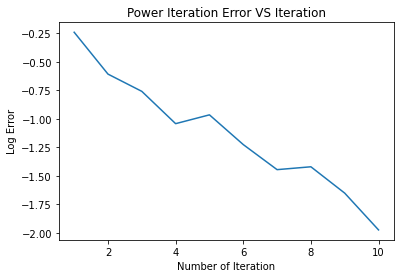

In [ ]:
x = link_matrix[:, 0] # inialize x0
N = 10
error_list_power = []
for i in range(N):
  y = link_matrix @ x
  x = y / np.linalg.norm(y)
  error_list_power.append(np.log(np.linalg.norm(link_matrix@x-x)))

plt.plot(range(1,N+1), error_list_power)
plt.title('Power Iteration Error VS Iteration')
plt.xlabel('Number of Iteration')
plt.ylabel('Log Error')
plt.show()

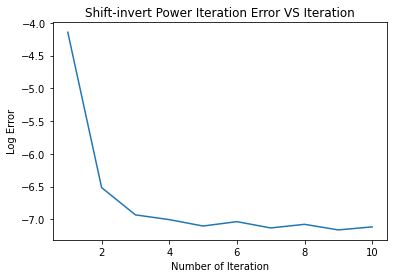

In [ ]:
# shift-invert power iteration
sigma = 0.99
x = link_matrix[:, 0] # inialize x0
I = np.identity(len(link_matrix))
N = 10
error_list_shift = []
for i in range(N):
  y = np.linalg.inv(link_matrix - sigma * I) @ x
  x = y / np.linalg.norm(y)
  error_list_shift.append(np.log(np.linalg.norm(link_matrix@x-x)))

plt.plot(range(1,N+1), error_list_shift)
plt.title('Shift-invert Power Iteration Error VS Iteration')
plt.xlabel('Number of Iteration')
plt.ylabel('Log Error')
plt.show()

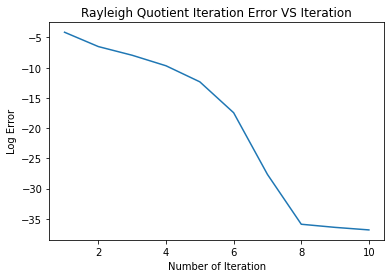

In [ ]:
# Rayleigh quotient iteration
x = link_matrix[:, 0] # inialize x0
I = np.identity(len(link_matrix))
N = 10
error_list_rayleigh = []
for i in range(N):
  if i == 0 or i == 1:
    sigma = 0.99
  else:
    sigma = x.T @ link_matrix @ x / (x.T @ x)
  y = np.linalg.inv(link_matrix - sigma * I) @ x
  x = y / np.linalg.norm(y)
  error_list_rayleigh.append(np.log(np.linalg.norm(link_matrix@x-x)))

plt.plot(range(1,N+1), error_list_rayleigh)
plt.title('Rayleigh Quotient Iteration Error VS Iteration')
plt.xlabel('Number of Iteration')
plt.ylabel('Log Error')
plt.show()

Text(0, 0.5, 'Log Error')

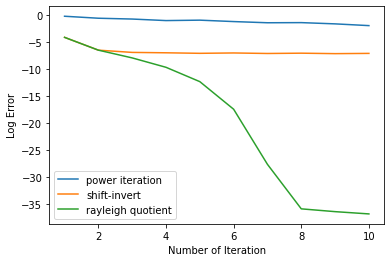

In [ ]:
plt.plot(range(1,N+1), error_list_power)
plt.plot(range(1,N+1), error_list_shift)
plt.plot(range(1,N+1), error_list_rayleigh)
plt.legend(["power iteration", "shift-invert", "rayleigh quotient"])
plt.xlabel('Number of Iteration')
plt.ylabel('Log Error')

In [ ]:
with open('pagerank_urls.txt') as f:
  links = f.readlines()

In [ ]:
top_5_idx = np.argsort(x)[-5:]
bottom_5_idx = np.argsort(x)[:5]

print("Top 5 results")
for idx in reversed(top_5_idx):
  print("index:", idx, "score:", x[idx])
  print(links[idx])

print("Bottom 5 results")
for idx in bottom_5_idx:
  print("index:", idx, "score:", x[idx])
  print(links[idx])

Top 5 results
index: 1 score: 0.365922994624336
http://www.hollins.edu/

index: 34 score: 0.31401112311195944
http://www.hollins.edu/admissions/visit/visit.htm

index: 35 score: 0.2933582569429568
http://www.hollins.edu/about/about_tour.htm

index: 57 score: 0.2863463204711831
http://www.hollins.edu/htdig/index.html

index: 48 score: 0.26013997545026274
http://www.hollins.edu/admissions/info-request/info-request.cfm

Bottom 5 results
index: 423 score: -0.33737117797816746
http://www1.hollins.edu/homepages/hammerpw/qrhomepage.htm

index: 986 score: -0.169083010461605
http://www1.hollins.edu/homepages/hammerpw/qrcourses2.htm

index: 985 score: -0.16905932718689234
http://www1.hollins.edu/homepages/hammerpw/qrcourses.htm

index: 984 score: -0.12666957488302732
http://www1.hollins.edu/homepages/hammerpw/qractivities.htm

index: 929 score: -0.09502573312567446
http://www1.hollins.edu/homepages/godardrd/homepage.htm

